# Introduction to PyMC3 - Overview
Duration: (2:48)

Welcome to the Bayesian Statistics in Python training. In this module, you will learn how to quantify uncertainty using the Bayesian way. 

For example, if you want to know the probability that a certain
American football player will make a field goal, using Bayesian method, you will rely on your prior knowledge that you have about the player to form an initial estimate and observe the player performance to be able to update your belief. 

We can combine both sources of knowledge to improve our estimate that lead to a better understanding that the player will make the field goal.

In [27]:
# First, let's import the pandas and numpy libraries
import pandas as pd
import numpy as np

# In addition, I want to show some plots, so we'll import matplotlib as well
import matplotlib.pyplot as plt

# Finally, we'll bring in the scipy stats libraries
from scipy import stats

In [28]:
# The data for this lecture comes from the footballdb website, let's read it in to a pandas DataFrame
data = pd.read_csv('nfl.csv')
# And let's look at the first few lines
data.head()

Player Team    PAT     FG 0-19  20-29  30-39  40-49  50+  Lg  Pts
0  Harrison Butker   KC  0.938  0.895  0/0    9/9   9/10  13/13  3/6  56  147
1         Wil Lutz   NO  0.980  0.889  1/1    9/9    6/6  13/15  3/5  58  144
2    Justin Tucker  BAL  0.966  0.966  0/0    8/8    9/9  10/11  1/1  51  141
3    Zane Gonzalez  ARI  0.971  0.886  0/0  12/12  12/13    5/8  2/2  54  127
4         Matt Gay   TB  0.896  0.771  0/0    6/6    5/7  11/14  5/8  58  124

So, we can see that the data includes the player name, some team identification, their probability of
attaining a field goal under the column FG, and information about how successful the kicker was in achieving
a field goal each time they tried at given distances. For instance, we can see in the second row that Wil Lutz was the only kicker to attempt a field goal within 20 yards, and he was successful, while at 50 or more yards out everyone has attempted but only a couple have perfectly achieved a field goal.

Let's look at a histogram of the field goal probability. A histogram is commonly used to describe the frequency distribution of the data. Each bar in the histogram groups the data whose value falls within the class interval, the height of which corresponds to the frequency of the class.

<Figure size 576x576 with 0 Axes>

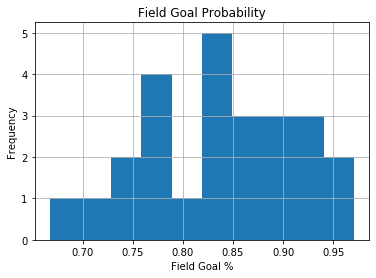

In [29]:
# First let's create a new figure using the figure function of matplotlib
fig = plt.figure(figsize = (8,8))
# You'll notice I decided to set the figure size at 8 inches wide by 8 inches tall

# Now we'll just plot the histogram using the convenience function of pandas, 
# indicating we want column FG to be the one plotted
data.hist(column = "FG")

# Finally, let's set the label for the x and y axes
plt.xlabel("Field Goal %")
plt.ylabel("Frequency")

# And set the title and show the plot
plt.title("Field Goal Probability")
plt.show()

Here you can see most American football player made roughly 80% of the field goal, only few of them making less than 70% or more than 90%.

The Bayesian statistics in Python training consists of two parts. The first part of our training we'll introduce the Bayesian concepts associated with creating Bayesian models, and in the second part we'll learn PyMC3, an elegant Python package in implementing Bayesian models. Bye for now!

# Introduction to PyMC3 - Concept
Duration:

In this lecture we're going to talk about the theories, advantages and application of using Bayesian statistics. 

Broadly speaking, Bayesian inference is a method of making statistical decisions utilizing Bayes’ theorem, which is a mathematical method of updating the probability for a hypothesis as more information becomes available. Bayesian inference is a powerful tool to help us quantify uncertainty in the form of probabilities. 

Central to the application of Bayesian methods is the idea of a distribution. In general, a distribution describes how likely a certain outcome will occur given a series of inputs. For instance, we might have a distribution which describes how likely a given kicker on a football team will make a field goal (the outcome). Now we revisit the graph from above. 

Here is an example of what the distribution of National Football League kicker's field goal probability looks like. It shows that most kickers score roughly 85 percent of the field goals and the number drops gradually on both sides as field goal percentage goes up and down. So the graph manifests a roughly binomial distribution.

<Figure size 576x576 with 0 Axes>

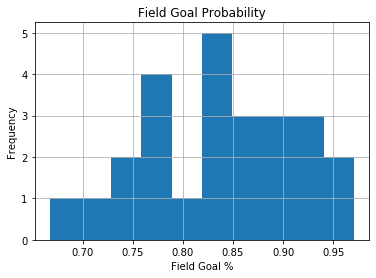

In [30]:
fig = plt.figure(figsize = (8,8))

# Plot the histogram to show the column FG
data.hist(column = "FG")

# Finally, let's set the label for the x and y axes
plt.xlabel("Field Goal %")
plt.ylabel("Frequency")

# And set the title and show the plot
plt.title("Field Goal Probability")
plt.show()

In Bayesian statistics, we consider our initial understanding of the outcome of an event before data is collected. We do this by creating a **prior distribution**. Similar to most data science methods, we will then collect the observed data to create a model using some probability distribution. We rely on that model called **likelihood** to update our initial understanding (**prior distribution**) using the **Bayes' Theorem**.

We won't go into the maths of Bayes' theorem, but the theorem suggests that by using the observed data as new evidence, the updated belief incorporates our initial understanding and the evidence related to the problem being examined, just like we cumulate knowledge by learning the problems or doing experiments. **Bayes's theorem** also suggests a nice property that the updated belief is proportional to the product of the **prior distribution** and the **likelihood**. We call the updated belief **posterior distribution**. 

Now we'll move on how to apply Bayesian statistics.

![](Bayesian_Model.png)

To perform a Bayesian inference we consider a 4-step model. 

First, specify prior distribution. We can start with forming some prior distribution for our initial understanding of a subject matter, before observing data. This can come from personal experience, literature, or even thoughts from experts (**prior distribution**).

During the second and third step, we begin by **collecting the data** from observations or experiments and then using some probability distribution to **construct a model** which represents how likely the outcomes occur given the data input. In our example, we can collect evidence by recording American football players' field goal performance for a year and make a database. Then we can construct a probabilistic model to represent the distribution of the NFL data.

Finally, apply the Bayes' rules. In this step, we incorporate the **prior distribution** and the observed data using Bayes' rules to update our understanding and return the **posterior distribution**. 

Let's first focus on the first three steps. 

For the NFL example, as we observe kicks from a player, we can record the success and failures and then assign binomial distribution to represent the results for each kick. We usually use beta distribution to set up a prior distribution, where you can decide how great is the probability that he or she will make a field goal based on your knowledge.

In [31]:
# We can randomly generate binomial distributed samples by 
# setting the sample size as 100 and success probability of making a field goal as 0.8
n = 100
p = 0.8
size = 100
# Next we can set up binom as a random binomial variable that will give us 100 draws of binomial distributions
binom = np.random.binomial(n, p, size)

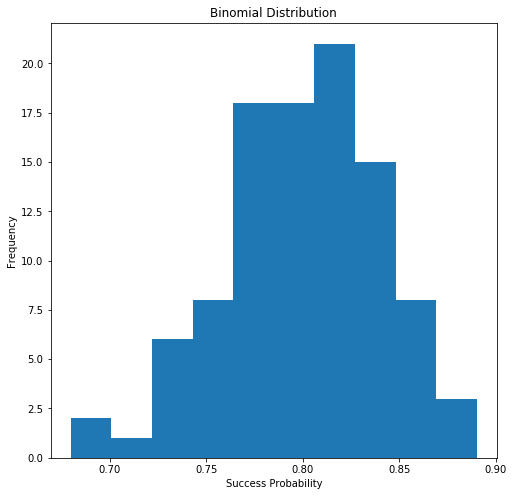

In [32]:
# Now we use plt.figure function to define the figure size and plt.hist to draw a histogram, so you 
# can visualize what's going on here
plt.figure(figsize=(8,8))
plt.hist(binom/n)
# Let's set the x and y axis and the title as well.
plt.xlabel("Success Probability")
plt.ylabel("Frequency")
plt.title("Binomial Distribution")
# and show the plot
plt.show()

Once again, you can see from this graph that most samples made roughly 80% of the field goaal, with only few of those making less than 72.5% and more than 87.5%. We can again say the histogram shows a binomial distribution with mean closed to 0.8.

## Posterior Distribution

The question of how to obtain the posterior distribution by Bayes' rules represents the coolest part of Bayesian analysis.

Traditional methods include integrating the random variables and determining the resulting distribution in closed form. However, it is not always the case that posterior distribution is obtainable through integration. 

**Probabilistic programming languages (PPL)**, a renowned programming tool to perform probabilistic models automatically, can help update the belief iteratively to approximate the posterior distribution even when a model is complex or hierarchical. For example, the NUTS algorithm under Monte Carlo Markov Chain (MCMC), which we will discuss in the next video, is found to be effective in computing and representing the posterior distribution. 

## Bayesian Inference Advantages

![](Bayesian_Advantage.png)

So why Bayesian Inference useful? A salient advantage of the Bayesian approach in statistics lies on its capability of easily cumulating knowledge. For every time when you have new evidence, using Bayesian approach can effectively update our prior knowledge. 

Another potential of Bayesian statistics is that it allows every parameters, such as the probability of making the field goal, be summarized by probability distributions, regardless of whether it is prior, likelihood, or posterior. With that, we can always look at the distributions to quantify the degree of uncertainty. 

Furthermore, Bayesian approach generates more robust posterior statistics by utilizing flexible distributions in prior and the observed data.

In the next video, we will introduce PyMC3, a Python package to perform MCMC conveniently and obtain easily interpretable Bayesian estimations and plots, with a worked example. Bye for now!

# Introduction of PyMC3 through worked example: simple Bayesian linear regression

Duration:

In this video we will introduce PyMC3 through modeling Bayesian linear regression in this training example. The aim of Bayesian Linear Regression here is to determine the effect and quantify the uncertainty of TV advertisement on TV sales. 

The model assumes that every parameters specifying the linear model are generated from a probability distribution. Again, we are going to provide an initial estimate for each parameter and improve our estimate as we gather more data. 


In [33]:
# Let's read the TV advertisement data into a pandas DataFrame
tv_data = pd.read_csv("Advertising.csv")
# And let's look at the first few lines
tv_data.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [34]:
# You will see a weird column Unnamed:0 in the dataset. 
# Let us get rid of Unnamed:0 column using the drop function.
# Here axis = 1 means we remove the entire column.
tv_data = tv_data.drop(['Unnamed: 0'], axis=1)
tv_data.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [35]:
# We can use matplotlib.pyplot.subplot function to create 4 histograms together 
# We turn off the share x-axis feature so each of the plots adapts to its own x range.
fig, axes = plt.subplots(1, 4, sharex = False, figsize = (16,5))

# For each of the four columns (i.e. TV commercial advertisement, radio advertisement, 
# newspaper advertisement and TV unit sales), we plot the column and set the titles accordingly.
axes[0].hist(tv_data.TV)
axes[0].set_title("TV Commercial Advertisement")
axes[1].hist(tv_data.radio)
axes[1].set_title("Radio Advertisement")
axes[2].hist(tv_data.newspaper)
axes[2].set_title("Newspaper Advertisement")
axes[3].hist(tv_data.sales)
axes[3].set_title("TV Unit Sales")
plt.show()

Let's now set up the prior distribution to each parameter. 

A common way to understand the effect of TV advertisements on sales is to describe the relationship using a model. We can specify the linear combination of TV advertisements and TV sales by assigning the average TV unit sales without TV commercial advertisements as intercept &\alpha& (**alpha**) and assigning the increase of TV unit sales by a unit increase in TV commercial advertisement as regression coefficient $\beta$ (**beta**). 

$$ TV\_Sales = \alpha + \beta \times (TV \_Ads) $$

We can formulate our initial understanding based on the following:

- Without advertisements, the sales of TV is likely to be low. Let us choose the normal prior for intercept, with mean 4 and standard deviation 2, which is the square root of 4. 

- Increasing TV commercial advertisement is likely to boost TV sales. Let us also choose the normal prior for $\beta_1$ (**beta 1**). On top of that, let us hypothesize that one unit increase in TV advertising will lead to 0.05 unit increase in TV sales, and the standard deviation is 0.05. 

- For the variability of the effect of advertisement on TV sales in our model $\sigma$ (**sigma**), most literature suggests to assign a half-normal prior with 0 mean and a small number of variance.

- Since the histogram shows roughly a bell shape for the TV unit sales, we would like to predict TV sales (Y) as normally-distributed observations with expected value $\mu$ (**mu**) and variance $\sigma^2$ (**sigma square**), where $\mu$ (**mu**) should follow the linear combination that predicts the TV sales.

$$\alpha \sim N(4,4)$$
$$\beta_1 \sim N(0.05,0.05)$$
$$\sigma \sim |N(0,1)|$$ 
$$\mu = \alpha + \beta \times (TV \_Ads)$$

In [36]:
# To simplify model specification, we create variables tv_ads and tv_sales to store the TV advertisement 
# and TV sales data as pandas series
tv_ads = tv_data['TV']
tv_sales = tv_data['sales']

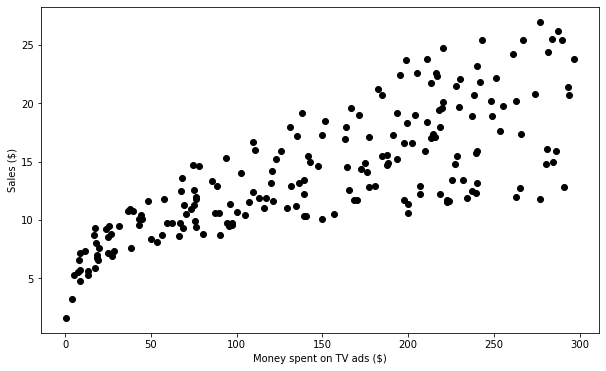

In [37]:
# Let's create a new scatterplot figure to show the relationship between
# the money spent on TV advertisement and TV sales using the figure function of matplotlib
plt.figure(figsize=(10, 6))
# We specify first the x-axis for advertisement and then y-axis for TV sales
plt.scatter(
    tv_ads,
    tv_sales,
    c='black'
)

# Finally, let's set the label for the x and y axes and then show the plot
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

We can see a positive relationship between the money spent on TV ads and the TV sales. As a company spends more expenditure on TV advertisement, the number of TV sales is likely to increase.

With all the settings, we are going to enter the process of model specification, in which the necessary data and parameters are included to the Bayesian model. This is where PyMC3 comes into play.

PyMC3 is a Python package for probabilistic programming which allows you to write down models using an intuitive syntax to describe a data generating process. Going further, PyMC3 supports various MCMC algorithms for model fitting, which is beautiful because it can handle virtually any statistical model with a few lines of code.

Now let us go through the process of Bayesian modeling and visualizing posterior results in PyMC3.

In [43]:
# First, let's import the pymc3 library as pm
import pymc3 as pm

## Model Specification

So, how to specify prior distribution? In PyMC3, the syntax of specifying the model is approximately the same as the statistical notation. 

You can browse this website https://docs.pymc.io/api/distributions/continuous.html to see a glossary of probability distribution available to use in PyMC3.

### MCMC approach using PymC3

In [47]:
# We start with creating an instance model with an empty pm.Model function
model = pm.Model()

# Now let us specify the model. The with model statement wraps up every prior and likelihood
with model:
    
    # Our model assumes that each observation y is sampled from a normal distribution with a mean mu 
    # with a normally distributed prior and standard deviation sigma with a half-normal prior.
    
    # Let us construct priors one by one.
    # We assign normal prior to the intercept with mean 4 and standard deviation 2,
    # then assign normal prior to beta1 with mean 0.05 and standard deviation 0.05.
    # For standard deviation sigma, we are going to use pm.Halfnormal to assign half normal prior.
    alpha = pm.Normal('alpha', mu=4, sigma=2)
    beta = pm.Normal('beta', mu=0.05, sigma=0.05)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # The model also requires a specification of the expected value of outcome mu
    # Here I am going to define mu equals to the intercept alpha plus beta1 times tv_ads which is the money
    # spent on TV advertisement
    mu = alpha + beta * tv_ads
    
    # To complete the model, the likelihood function for the data must be defined. 
    # The observed argument explicitly flags the random variable y_obs as one that is not a latent variable, 
    # but instead is given by the data.
    # We take tv_sales as the input data and assign a normal prior corresponding to the model specification.
    # So the expected value mu is used to specify the mean value for the prior
    y_obs = pm.Normal('y_obs', mu = mu, observed = tv_sales)

In [48]:
# To initiate the sampling process, we use the pm.sample function. 
# This function should be placed within the context of our model.
seed = 1000
with model:
    # In pm.sample function, it is useful to specify the number of draws and the number of chains 
    # that we want the sampler to run.
    # We set the sampler to take 500 draws and take 2 chains
    # We also provide a seed to the random_seed generator to make the results reproducible. 
    # Now let us start the sampler
    trace = pm.sample(draws = 500, chains = 2, random_seed = seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:04<00:00, 437.58draws/s]
The acceptance probability does not match the target. It is 0.8970823153389215, but should be close to 0.8. Try to increase the number of tuning steps.


It may take several minutes for PyMC3 to run the MCMC model. As you can see, after sampling, the MCMC chains are returned as a single PyMC3 trace object, which contains the sampled values for every iteration in every chain.

## Posterior Diagnostics

So how to compute posterior diagnostics based on the trace object? How to interpret the result?

PyMC3 provides a comprehensive library of built-in functions to diagnose and analyze the resulting set of MCMC samples. Those include, but not limited to, traceplot, summary table, and Gelman-Rubin statistics.

### Traceplot

To analyze the results, one of the primary checks of sampling adequacy is a visual analysis of the **trace plots**.
This gives you an understanding about the distribution of our updated belief of how TV advertisement affects TV sales. Let us run the pm.traceplot function to get a sense of the simulation.

/opt/conda/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/opt/conda/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


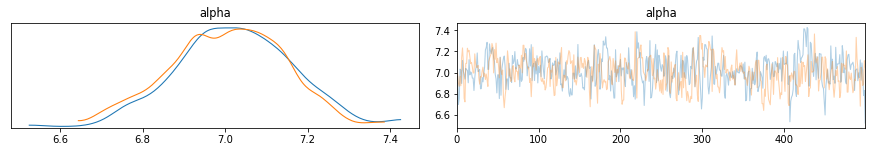

In [49]:
# The pm.traceplot function takes the trace object. You can add an additional argument
# called varnames to specify alpha, beta and sigma, the random variables you want to include in the plot.

pm.traceplot(trace,
            varnames = ['alpha'])
plt.show()

In each of the graphs we will find two curves given by different linestyle. Because we took two chains for each parameter, the sampler generated two trajectories.

In the left column of the traceplots, we can see the estimated posterior distribution for $\alpha$, which is the intercept. From the density plot, we see that both curves appear to be bell-shaped, with more values near the center and fewer as you move away on both sides. We can say the posterior distribution of alpha follows approximately normal distribution. 

In addition, we can obviously interpret the intercept that without TV advertisement, the expected sales of TV is highly likely to fall between 6.8 and 7.2 units. 

The right column of plots shows the path of the simulated posterior value of $\alpha$ in each iteration. It also uses different linetype to represent the corresponding MCMC chains. Since the chains maintain mostly flat trajectories, the graphs indicates good convergence for the intercept $\alpha$.

/opt/conda/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/opt/conda/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


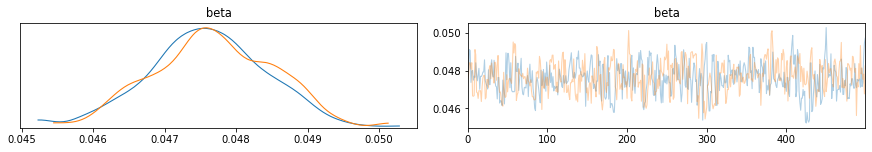

In [50]:
pm.traceplot(trace,
            varnames = ['beta'])
plt.show()

So how would TV advertisement boost the TV sales? Here we look at the traceplot of $\beta$, the regression coefficient. On the left, it is nice to see that both density curves of $\beta$ appear to be bell-shaped and mostly overlay each other. Again, it shows that $\beta$ follow approximately normal distribution.

Since most sampled values fall between 0.046 and 0.049 for both curves, we can interpret the regression coefficient that a unit increase of money spent on TV advertisement will highly likely to increase TV sales by between 0.046 and 0.049 unit. Similarly, both curves of $\beta$ converge well, as you can see the trajectories are mostly flat.



In [51]:
pm.traceplot(trace,
            varnames = ['sigma'])
plt.show()

/opt/conda/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/opt/conda/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


We finally look at the behaviour of $\sigma$. Here is how we quantify the uncertainty based on probability.

We can see that the $\sigma$ value demonstrates a decreasing trend in probability as the value increases. That is to say, the sampled values are highly likely to have very small standard deviation. Put it into the context, it stronly suggests that the values of intercept and the effect of TV advertisement are precise. 

From the right, we can observe slight fluctuations appear at certain MCMC samples, but the overall trajectories of $\sigma$ show decent convergence. 

### Summary Table

So is there a better way to know about the credible values for the expected TV sale without advertisement, and the effect of TV advertisement on the sales?

In [52]:
# We can use pm.summary to obtain a table-based summary statistics of the 
# posterior distributions for each parameter
# For clarity purposes, we round the results into 3 digits
pm.summary(trace).round(3)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
alpha  7.012  0.141   6.750    7.267      0.008    0.005     352.0   349.0   
beta   0.048  0.001   0.046    0.049      0.000    0.000     410.0   410.0   
sigma  0.767  0.591   0.000    1.785      0.033    0.023     327.0   327.0   

       ess_bulk  ess_tail  r_hat  
alpha     347.0     404.0   1.01  
beta      405.0     289.0   1.01  
sigma     261.0     292.0   1.00

This summary provides common posterior statistics such as posterior mean, posterior standard deviation, highest posterior density referred as hpd, Markov Chain Standard Error statistic abbreviated as mcse, and effective sample size as ess. Finally, you can see the convergence factor given by r_hat. The format of the summary table is pandas.DataFrame.

See: https://docs.pymc.io/api/stats.html

For example, we see that the posterior mean of alpha is 7.01, with posterior standard deviation 0.14. 

Here we mainly focus on the hpd_3% and hpd_97% which calculate the highest posterior density on lower end and higher end. These two values construct the 95% credible interval. We could say after observing the data, we are 95% certain that 6.75 to 7.27 units of TV would be sold without advertisement. Similarly, we could say after observing the data, we are 95% certain that a unit increase in the expenditure on TV advertisement will boost TV sales by 0.046 to 0.049.
If you refer back to the traceplot, these results confirm our observation of the density plots. 

If you look closely at the ess columns, ess_mean stands for the average effective sample size, which is an evaluation metric for convergence. We won't go into the detail of ess at this point but I do encourage you take a look about the concepts on the website.

Effective sample size: https://mc-stan.org/docs/2_18/reference-manual/effective-sample-size-section.html

### Gelman-Rubin Convergence Criterion

Finally, convergence is an essential factor evaluating the goodness of model. Here we look at the Gelman-Rubin statistics which represent the ratio of the pooled variance of values across all chains to the average variance of each chain. Gelman-Rubin statistics is scaled so that 1 indicates perfect convergence. Theoretically, if the Gelman-Rubin statistic is less than 1.1, the chains are decently converged, so that no additional model reconstruction is needed (Kang, 2018). 

In [53]:
# We can use pm.gelman_rubin function to obtain Gelman-Rubin statistics to check whether 
# the posterior distribution converges.
print(pm.gelman_rubin(trace,
                     varnames=['alpha', 'beta', 'sigma']))

<xarray.Dataset>
Dimensions:  ()
Data variables:
    alpha    float64 1.01
    beta     float64 1.006
    sigma    float64 1.0


/opt/conda/lib/python3.7/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
/opt/conda/lib/python3.7/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


We can find the Gelman-Rubin statistics at "Data variables" part. Here all the Gelman-Rubin statistics are approximately 1, indicating that all chains are converged.

To recap, you have learned how to specify model, initiate sampling, compute and interpret posterior diagnostics using PyMC3. In our code transfer test, you will apply some of these Bayesian methods to iteratively update our knowledge regarding how accurate the NFL kickers can make the field goals. Good luck with the rest of the study!

Reference:
    1. http://www-personal.umd.umich.edu/~wiclarks/ASTRGroup/StatsSeminars/FlatWebpages/02_ProbabilityDistributions.html
    2. https://docs.pymc.io/notebooks/getting_started.html